## 1. Foreword

Your problem statement will be the guiding force that influences every question and decision-making from this point onward. Before starting any of the exercises, get that down.

It would be helpful to refresh the basics of statistical modelling and machine learning before proceeding. Here are the essential concepts that you should understand:

1. **Exploratory Data Analysis (EDA):**
    - Descriptive statistics (mean, median, variance, quantiles)
    - Understanding distributions and variability

2. **Data Pre-processing:**
    - Features & Target Transformation
    - Creating new features
    - Feature Selection

3. **Regression Models:** Linear Regression, Regularized Regression (Ridge, Lasso)
    - Interpreting coefficients, understanding R², MSE, MAE, RMSE

4. **Classification Models:** Logistic Regression, Decision Trees, Random Forests, SVMs, K-Nearest Neighbors
    - Interpreting probabilities, coefficients (log-odds), and feature importances

5. **Evaluation Metrics:**
    - For Regression: R², Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)
    - For Classification: Accuracy, Precision, Recall, F1 Score, ROC-AUC, and Confusion Matrix

6. **Model Selection & Validation:**
    - Train-test splits, cross-validation techniques
    - Overfitting vs. underfitting
    - Hyperparameter tuning (grid search, random search)

7. **Model Interpretability & Explainability:**
    - Interpreting model coefficients and feature importance
    - Visualization of decision trees (using plot_tree)
    - Tools like SHAP and LIME for local/global explanations

The entire Data Science process looks like this:

1. **Exploration:** Start with EDA to understand your data. Ask questions about distributions, correlations, and anomalies.
2. **Modeling:** Build models using core algorithms, evaluate with relevant metrics, and examine model outputs (coefficients, feature importances).
3. **Evaluation:** Compare metrics against baselines, inspect errors, and assess whether the model meets the problem requirements.
4. **Iteration:** Use insights from the evaluation to refine feature engineering, adjust preprocessing steps, or try different models.
5. **Repeat:** Iterate through exploration, modeling, evaluation until you reach the desired balance between performance, interpretability, and practical applicability.

---


## 2. Assignment Tasks

1) Define a problem statement
2) Perform EDA (if you are choosing a new dataset)
3) Use EDA insights for feature selection and feature engineering
4) Create your first 3 models using the provided framework
5) Evaluate the models and then attempt to improve them
6) Interpret model results and outputs (coefficients, trees) and continue to add to your insights
7) Explore 2 new models of your choice. (Some suggestions are KNN, SVM for classification & Ridge, Lasso for regression)

*Note:* These tasks are guidelines. Question every characteristic of your dataset and models.

---


## 3. Resources

1. [Concise explanation for popular Machine Learning models](https://www.youtube.com/watch?v=E0Hmnixke2g)
2. [Fantastic sklearn algorithms cheat sheet](https://scikit-learn.org/stable/machine_learning_map.html)
    - [Sklearn tutorial](https://scikit-learn.org/1.4/tutorial/index.html)
3. The *Python Data Science Handbook* has a great machine learning section.

---


## 4. Predictive Modelling (Your Assignment Should be Below)

For reference, below is working code roughly following the guidelines and using the same dataset from previous sessions.

---


## **1. Objective:**
A phishing website is a common social engineering method that mimics trusted URLs and webpages. The objective of this project is to train machine learning models to predict phishing websites using extracted URL features.

---


## **2. Collecting the Data:**
We need a set of URLs labeled as legitimate (0) and phishing (1). Phishing URLs are available from PhishTank and legitimate URLs from the University of New Brunswick dataset.

---


In [1]:
import pandas as pd
import requests

In [ ]:

# Downloading the phishing URLs file (using wget2 command via !, adjust if needed)
!wget2 -O DataFiles/online-valid.csv "http://data.phishtank.com/data/online-valid.csv"

In [2]:

# Load phishing URLs data
data0 = pd.read_csv("DataFiles/online-valid.csv")
print(data0.head())
print(data0.shape)


   phish_id                                                url  \
0   8997132   https://webmail-authionos.com/fr/ionos-fr/login/   
1   8997131  https://loggen.hover.benedwards.co.uk/manageho...   
2   8997126        https://sp350083.sitebeat.crazydomains.com/   
3   8997123        https://nrcrabbbe.wixsite.com/my-site-11sh2   
4   8997122      https://my-site-103475-103976.weeblysite.com/   

                                    phish_detail_url  \
0  http://www.phishtank.com/phish_detail.php?phis...   
1  http://www.phishtank.com/phish_detail.php?phis...   
2  http://www.phishtank.com/phish_detail.php?phis...   
3  http://www.phishtank.com/phish_detail.php?phis...   
4  http://www.phishtank.com/phish_detail.php?phis...   

             submission_time verified          verification_time online target  
0  2025-03-02T11:02:01+00:00      yes  2025-03-02T11:12:05+00:00    yes  Other  
1  2025-03-02T10:29:43+00:00      yes  2025-03-02T10:41:46+00:00    yes  Other  
2  2025-03-02T10:25:44+

We collected thousands of phishing URLs. To balance the data, we randomly sample 5,000 phishing URLs.

---


In [3]:
# Collect 5,000 phishing URLs randomly
phishurl = data0.sample(n=50000, random_state=12).reset_index(drop=True)
print(phishurl.head())
print(phishurl.shape)


   phish_id                                                url  \
0   7809052  https://bafybeigw5jlwvykqqwfwiz7bykja2imjyes2o...   
1   8996646                 https://ezdriverma.com-xaaawc.vip/   
2   8794529             https://netzeromailaccount.weebly.com/   
3   8721808                              https://q-r.to/bfJmVL   
4   8787848                            https://l.ead.me/bfRE7s   

                                    phish_detail_url  \
0  http://www.phishtank.com/phish_detail.php?phis...   
1  http://www.phishtank.com/phish_detail.php?phis...   
2  http://www.phishtank.com/phish_detail.php?phis...   
3  http://www.phishtank.com/phish_detail.php?phis...   
4  http://www.phishtank.com/phish_detail.php?phis...   

             submission_time verified          verification_time online target  
0  2022-10-03T11:54:54+00:00      yes  2022-10-03T12:06:10+00:00    yes  Other  
1  2025-03-01T09:43:44+00:00      yes  2025-03-01T12:32:26+00:00    yes  Other  
2  2024-10-05T09:10:03+

Now, we load the legitimate URLs from the benign list file.

---


In [4]:
# Load legitimate URLs data
data1 = pd.read_csv("DataFiles/benign_urls.csv")
print(data1.head())
print(data1.shape)

                         url   label
0     https://www.google.com  benign
1    https://www.youtube.com  benign
2   https://www.facebook.com  benign
3      https://www.baidu.com  benign
4  https://www.wikipedia.org  benign
(316254, 2)


In [5]:

# Collect 5,000 legitimate URLs randomly
legiurl = data1.sample(n=50000, random_state=12).reset_index(drop=True)
print(legiurl.head())
print(legiurl.shape)


                                                 url   label
0  https://www.metacafe.com/watch/yt-HXsvVQe34k8/...  benign
1        https://www.youtube.com/watch?v=ed6iq2Eylq4  benign
2          https://www.oliver-hardy.gonetoosoon.org/  benign
3  https://www.sportsillustrated.cnn.com/vault/to...  benign
4  https://www.city-data.com/forum/seattle-area/7...  benign
(50000, 2)


## **3. Feature Extraction:**

We extract features from the URLs. The features include:

### **3.1. Address Bar Based Features:**
- **Domain of URL:** Extracted from the URL.
- **IP Address in URL:** Checks if the URL uses an IP address.
- **"@" Symbol in URL:** Detects presence of '@'.
- **Length of URL:** Classifies URLs with length ≥54 as suspicious.
- **Depth of URL:** Number of '/' in the URL path.
- **Redirection:** Checks for redirection using "//".
- **"http/https" in Domain:** Looks for HTTPS token in the domain.
- **Using URL Shortening Services:** Flags known shortening services.
- **Prefix or Suffix "-" in Domain:** Detects '-' in the domain.

### **3.2. HTML and JavaScript Based Features:**
- **IFrame Redirection**
- **Status Bar Customization (Mouse Over)**
- **Disabling Right Click**
- **Website Forwarding**

### **New Features (Lexical, Statistical & Advanced Pattern Analysis):**
- **URL Entropy:** Shannon entropy of the URL.
- **Domain Entropy:** Entropy of the domain.
- **Subdomain Count:** Number of subdomains (tokens beyond the base domain).
- **Digit Count:** Number of digits in the URL.
- **Special Character Count:** Count of unusual characters.
- **Uppercase Ratio:** Ratio of uppercase letters in the URL.
- **Domain Age:** Age of the domain (in days) via WHOIS.

---


In [3]:
# Required imports for feature extraction
from urllib.parse import urlparse
import ipaddress, re, time, math
import whoisdomain
from datetime import datetime
import requests
import subprocess
import re

# Address bar based feature functions
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www\.", domain):
        domain = domain.replace("www.", "")
    return domain

def havingIP(url):
    try:
        ipaddress.ip_address(url)
        return 1
    except:
        return 0

def haveAtSign(url):
    return 1 if "@" in url else 0

def getLength(url):
    return 0 if len(url) < 54 else 1

def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = sum(1 for j in s if len(j) != 0)
    return depth

def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        return 1 if pos > 7 else 0
    return 0

def httpDomain(url):
    domain = urlparse(url).netloc
    return 1 if 'https' in domain else 0

# Shortening services regex pattern
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    return 1 if re.search(shortening_services, url) else 0

def prefixSuffix(url):
    return 1 if '-' in urlparse(url).netloc else 0

# HTML & JavaScript based feature functions
def iframe(response):
    if response == "":
        return 1
    else:
        if re.search(r"<iframe|<frameBorder", response.text, re.IGNORECASE):
            return 0
        else:
            return 1

def mouseOver(response):
    if response == "":
        return 1
    else:
        if re.search(r"<script.*onmouseover.*</script>", response.text, re.IGNORECASE | re.DOTALL):
            return 1
        else:
            return 0

def rightClick(response):
    if response == "":
        return 1
    else:
        if re.search(r"event\.button\s*==\s*2", response.text):
            return 0
        else:
            return 1

def forwarding(response):
    if response == "":
        return 1
    else:
        return 1 if len(response.history) > 2 else 0

# New Feature Functions

def calculate_entropy(s):
    """Calculate the Shannon entropy of a string."""
    if not s:
        return 0
    probs = [float(s.count(c)) / len(s) for c in dict.fromkeys(s)]
    entropy = -sum(p * math.log(p, 2) for p in probs)
    return entropy

def count_subdomains(domain):
    tokens = domain.split('.')
    return max(0, len(tokens) - 2)

def count_digits(url):
    return sum(c.isdigit() for c in url)

def count_special_chars(url):
    # Count characters that are not alphanumeric and not common punctuation
    return sum(1 for c in url if not c.isalnum() and c not in ".:/?-_")

def uppercase_ratio(url):
    if len(url) == 0:
        return 0
    return sum(1 for c in url if c.isupper()) / len(url)

def get_domain_age(domain):
    whois_path = "/opt/homebrew/opt/whois/bin/whois"  # Update with your actual binary path

    try:
        # Run WHOIS command and capture output
        result = subprocess.run([whois_path, domain], capture_output=True, text=True)

        if result.returncode != 0:
            print(f"WHOIS command failed with code: {result.returncode}")
            return -1  # Whois command failed

        output = result.stdout

        # Print a sample of the output for debugging
        print(f"WHOIS output sample (first 200 chars): {output[:200]}")

        # More comprehensive pattern matching for creation date
        creation_date = None
        date_patterns = [
            r"Creation Date: (\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}Z)",
            r"Creation Date: (\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\+\d{4})",
            r"Creation Date: (\d{4}-\d{2}-\d{2})",
            r"created: (\d{4}-\d{2}-\d{2})",
            r"Created on: (\d{4}-\d{2}-\d{2})",
            r"Creation Date: (.+)"  # More general pattern as fallback
        ]

        for pattern in date_patterns:
            match = re.search(pattern, output, re.IGNORECASE)
            if match:
                date_str = match.group(1).strip()
                print(f"Found date string: '{date_str}'")
                break

        if not match:
            print("No creation date found in WHOIS output")
            return -1

        # Try multiple date formats
        date_formats = [
            "%Y-%m-%dT%H:%M:%SZ",
            "%Y-%m-%dT%H:%M:%S%z",
            "%Y-%m-%dT%H:%M:%S+0000",
            "%Y-%m-%d",
            "%d-%b-%Y",
            "%Y.%m.%d",
            "%d.%m.%Y",
            "%Y/%m/%d"
        ]

        for fmt in date_formats:
            try:
                creation_date = datetime.strptime(date_str, fmt)
                age_days = (datetime.now() - creation_date).days
                print(f"Domain age: {age_days} days (created on {creation_date})")
                return age_days
            except ValueError:
                continue  # Try next format

        print(f"Could not parse date string: '{date_str}'")
        return -1  # No valid date format found

    except Exception as e:
        print(f"Error: {str(e)}")
        return -1  # Whois lookup failure
# Feature extraction function integrating all features
def featureExtraction(url, label):
    start_time = time.time()
    features = []
    # Address bar based features
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))

    addr_time = time.time()
    print(f"[LOG] Address bar features extracted in {addr_time - start_time:.2f} sec")

    # New Lexical & Statistical Features / Advanced Pattern Analysis
    domain = getDomain(url)
    features.append(calculate_entropy(url))         # URL Entropy
    features.append(calculate_entropy(domain))        # Domain Entropy
    features.append(count_subdomains(domain))         # Subdomain Count
    features.append(count_digits(url))                # Digit Count
    features.append(count_special_chars(url))         # Special Character Count
    features.append(uppercase_ratio(url))             # Uppercase Ratio
    features.append(get_domain_age(domain))           # Domain Age

    lex_time = time.time()
    print(f"[LOG] Lexical/Statistical features extracted in {lex_time - addr_time:.2f} sec")

    # HTML & JavaScript based features
    try:
        response = requests.get(url, timeout=3)
    except:
        response = ""
    response_time = time.time()
    print(f"[LOG] HTTP request completed in {response_time - lex_time:.2f} sec")

    features.append(iframe(response))
    features.append(mouseOver(response))
    features.append(rightClick(response))
    features.append(forwarding(response))

    script_time = time.time()
    print(f"[LOG] HTML/JS features extracted in {script_time - response_time:.2f} sec")

    features.append(label)

    total_time = time.time()
    print(f"[LOG] Total time for URL {url}: {total_time - start_time:.2f} sec\n")
    return features


## **4. Computing URL Features**

We now extract features from each URL and store them in a list.

### **4.1. Legitimate URLs:**

We extract features from the 5,000 legitimate URLs.

*Note:* The feature list now includes new lexical/statistical features.

---


In [7]:
import pandas as pd
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
from IPython.display import clear_output  # Only works in Jupyter Notebook

def extract_legitimate_features_in_batches(legiurl, feature_names, batch_size=2500, max_workers=20, output_file='legitimate.csv'):
    """
    Extract features for legitimate URLs in batches, appending results to CSV.
    Supports parallel processing, automatic checkpointing, and clears output after each batch.
    """
    def task(index, url):
        return index, featureExtraction(url, 0)  # label=0 for legitimate

    # Assume the URL column is the first one
    correct_col = list(legiurl.columns)[0]
    total_urls = len(legiurl)

    # Check for existing progress
    processed_rows = 0
    if os.path.exists(output_file):
        try:
            existing_df = pd.read_csv(output_file)
            processed_rows = len(existing_df)
            print(f"[LOG] Resuming from batch {processed_rows // batch_size} (Processed {processed_rows} URLs)")
        except Exception as e:
            print(f"[LOG] Error reading existing CSV: {e}")

    # Calculate total number of batches remaining
    num_batches = (total_urls - processed_rows + batch_size - 1) // batch_size

    # Process URLs in batches
    for batch_index, start in enumerate(range(processed_rows, total_urls, batch_size), start=1):
        end = min(start + batch_size, total_urls)
        print(f"[LOG] Processing batch {batch_index}/{num_batches}: URLs {start} to {end}")

        results_list = [None] * (end - start)
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            future_to_offset = {}
            for i in range(start, end):
                url = legiurl[correct_col][i]
                future = executor.submit(task, i, url)
                future_to_offset[future] = i - start  # offset for batch

            for future in as_completed(future_to_offset):
                offset = future_to_offset[future]
                try:
                    _, result = future.result()
                    results_list[offset] = result
                except Exception as e:
                    print(f"Exception for URL index {start + offset}: {e}")
                    results_list[offset] = [None] * len(feature_names)

        # Convert batch results to DataFrame and append to CSV
        batch_df = pd.DataFrame(results_list, columns=feature_names)
        batch_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)

        # Clear output and show only the batch completion message
        clear_output(wait=True)
        print(f"[LOG] Batch {batch_index}/{num_batches} completed!")

    print("[LOG] All batches processed successfully!")

# Define feature names (ensure these match the order expected in featureExtraction)
feature_names = [
    'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
    'https_Domain', 'TinyURL', 'Prefix/Suffix', 'URL_Entropy', 'Domain_Entropy',
    'Subdomain_Count', 'Digit_Count', 'Special_Char_Count', 'Uppercase_Ratio',
    'Domain_Age', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards', 'Label'
]

# Run the function with your DataFrame 'legiurl'
extract_legitimate_features_in_batches(legiurl, feature_names, batch_size=2500, max_workers=20, output_file='legitimate.csv')

### **4.2. Phishing URLs:**

Now, extract features from the 5,000 phishing URLs.

---


In [8]:
import pandas as pd
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
from IPython.display import clear_output  # Works in Jupyter Notebook

def extract_phishing_features_in_batches(phishurl, feature_names, batch_size=2500, max_workers=20, output_file='phishing.csv'):
    """
    Extract features for phishing URLs in batches, appending results to CSV.
    Supports parallel processing, automatic checkpointing, and clears output after each batch.
    """
    def task(index, url):
        return index, featureExtraction(url, 1)  # label=1 for phishing

    correct_col = list(phishurl.columns)[1]  # Adjust column index if needed
    total_urls = len(phishurl)

    # Check for existing progress
    processed_rows = 0
    if os.path.exists(output_file):
        try:
            existing_df = pd.read_csv(output_file)
            processed_rows = len(existing_df)
            print(f"[LOG] Resuming from batch {processed_rows // batch_size} (Processed {processed_rows} URLs)")
        except Exception as e:
            print(f"[LOG] Error reading existing CSV: {e}")

    num_batches = (total_urls - processed_rows + batch_size - 1) // batch_size

    # Process URLs in batches
    for batch_index, start in enumerate(range(processed_rows, total_urls, batch_size), start=1):
        end = min(start + batch_size, total_urls)
        print(f"[LOG] Processing batch {batch_index}/{num_batches}: URLs {start} to {end}")

        results_list = [None] * (end - start)
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            future_to_offset = {}
            for i in range(start, end):
                url = phishurl[correct_col][i]
                future = executor.submit(task, i, url)
                future_to_offset[future] = i - start  # Offset within the batch

            for future in as_completed(future_to_offset):
                offset_index = future_to_offset[future]
                try:
                    _, result = future.result()
                    results_list[offset_index] = result
                    if (offset_index + 1) % 50 == 0:
                        print(f"Completed {start + offset_index + 1} out of {total_urls}")
                except Exception as e:
                    print(f"Exception for URL index {start + offset_index}: {e}")
                    # Fill with a default row of Nones to maintain list length
                    results_list[offset_index] = [None] * len(feature_names)

        # Convert batch results to DataFrame and append to CSV
        batch_df = pd.DataFrame(results_list, columns=feature_names)
        if os.path.exists(output_file):
            batch_df.to_csv(output_file, mode='a', header=False, index=False)
        else:
            batch_df.to_csv(output_file, mode='a', header=True, index=False)

        # Clear output and show only the batch completion message
        clear_output(wait=True)
        print(f"[LOG] Batch {batch_index}/{num_batches} completed!")

    print("[LOG] All phishing URL batches processed successfully!")

# Define feature names (ensure these match the order expected in featureExtraction)
feature_names = [
    'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
    'https_Domain', 'TinyURL', 'Prefix/Suffix', 'URL_Entropy', 'Domain_Entropy',
    'Subdomain_Count', 'Digit_Count', 'Special_Char_Count', 'Uppercase_Ratio',
    'Domain_Age', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards', 'Label'
]

# Run the function with your DataFrame 'phishurl'
extract_phishing_features_in_batches(phishurl, feature_names, batch_size=2500, max_workers=20, output_file='phishing.csv')

## **5. Final Dataset**

We now combine the legitimate and phishing URL features into one dataset and export it.

---


In [5]:
import pandas as pd

# Read CSV files for legitimate and phishing URLs
legi_df = pd.read_csv('legitimate.csv')
phish_df = pd.read_csv('phishing.csv')

# Combine the dataframes and reset the index
urldata = pd.concat([legi_df, phish_df]).reset_index(drop=True)

print(urldata.head())
print(urldata.tail())
print(urldata.shape)

# Save the combined dataframe to a CSV file
urldata.to_csv('urldata.csv', index=False)

                         Domain  Have_IP  Have_At  URL_Length  URL_Depth  \
0                  metacafe.com        0        0           1          3   
1                   youtube.com        0        0           0          1   
2  oliver-hardy.gonetoosoon.org        0        0           0          0   
3     sportsillustrated.cnn.com        0        0           1         10   
4                 city-data.com        0        0           1          3   

   Redirection  https_Domain  TinyURL  Prefix/Suffix  URL_Entropy  ...  \
0            0             0        0              0     4.542931  ...   
1            0             0        0              0     4.571500  ...   
2            0             0        0              1     4.054481  ...   
3            0             0        0              0     4.635739  ...   
4            0             0        0              1     4.317785  ...   

   Subdomain_Count  Digit_Count  Special_Char_Count  Uppercase_Ratio  \
0                0        

## **5.1 Visualizing the Data**

Let's visualize data distributions and correlations.

---


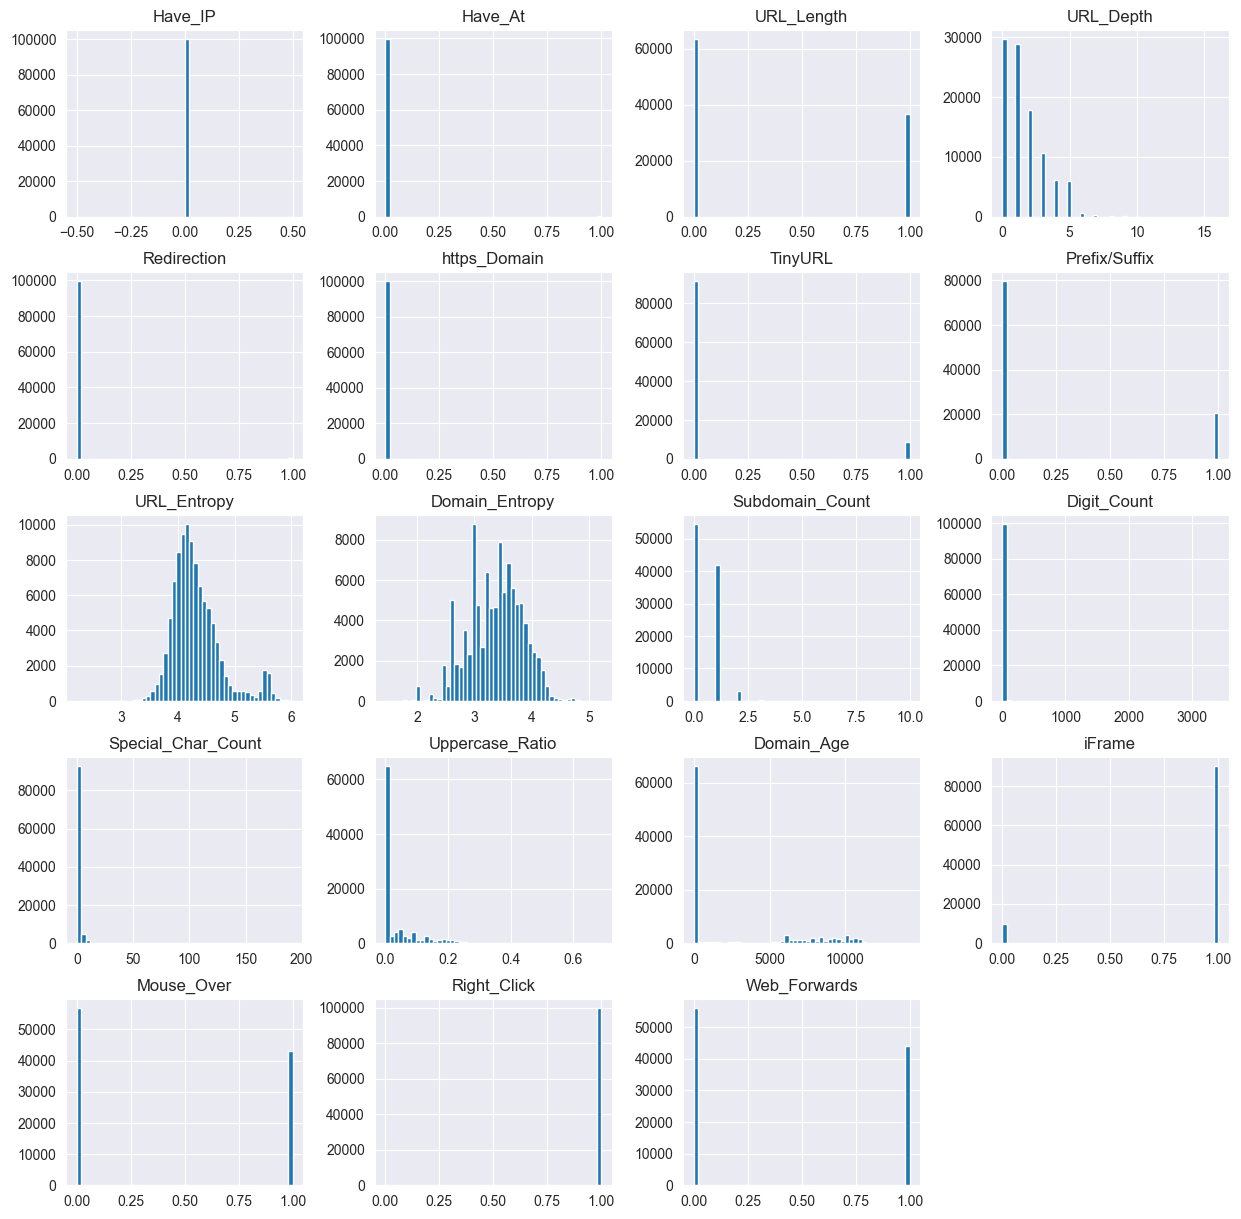

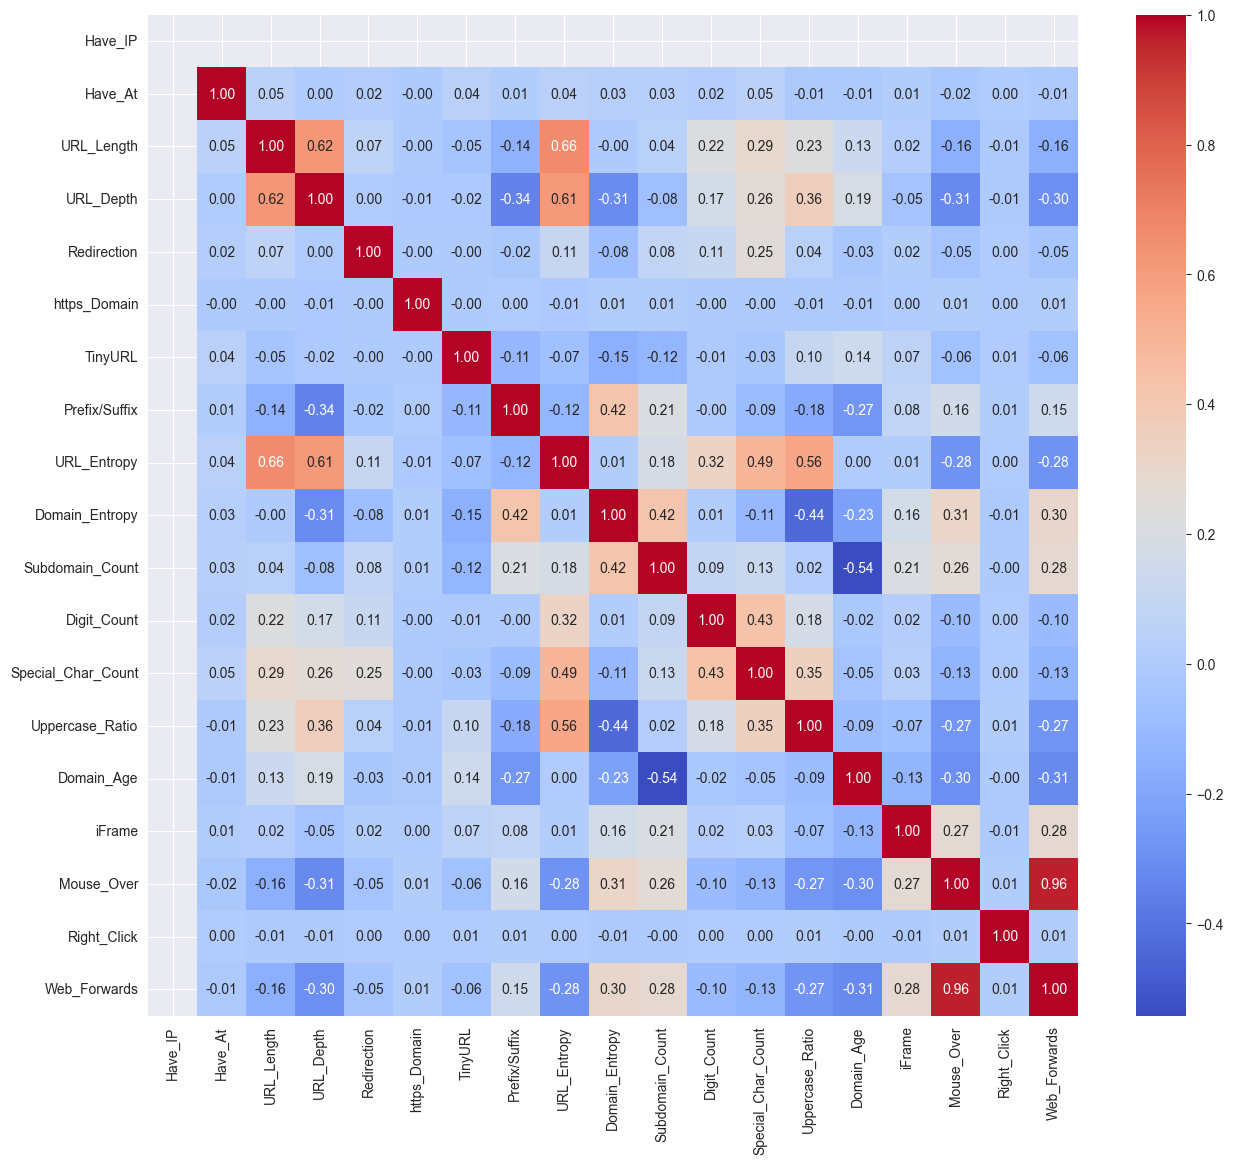

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for each numeric feature in the dataset (excluding 'Domain')
numeric_cols = urldata.drop(['Domain', 'Label'], axis=1).select_dtypes(include=['number']).columns
urldata[numeric_cols].hist(bins=50, figsize=(15,15))
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(urldata[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


## **5.2 Data Preprocessing & EDA**

Check the data summary and ensure there are no missing values.

---


In [7]:
print(urldata.describe())
print(urldata.isnull().sum())


        Have_IP        Have_At     URL_Length      URL_Depth    Redirection  \
count  100000.0  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.0       0.003930       0.365580       1.571310       0.005190   
std         0.0       0.062567       0.481595       1.554239       0.071855   
min         0.0       0.000000       0.000000       0.000000       0.000000   
25%         0.0       0.000000       0.000000       0.000000       0.000000   
50%         0.0       0.000000       0.000000       1.000000       0.000000   
75%         0.0       0.000000       1.000000       2.000000       0.000000   
max         0.0       1.000000       1.000000      16.000000       1.000000   

        https_Domain        TinyURL  Prefix/Suffix    URL_Entropy  \
count  100000.000000  100000.000000   100000.00000  100000.000000   
mean        0.000170       0.087150        0.20438       4.310922   
std         0.013037       0.282056        0.40325       0.426581   
min         

Since the 'Domain' column is not significant for model training, we drop it later.
Also, we shuffle the dataset to avoid order bias.

---


In [8]:
data = urldata.drop(['Domain'], axis=1).copy()
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())


   Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0        0        0           0          0            0             0   
1        0        0           1          3            0             0   
2        0        0           1          5            0             0   
3        0        0           1          2            0             0   
4        0        0           0          2            0             0   

   TinyURL  Prefix/Suffix  URL_Entropy  Domain_Entropy  Subdomain_Count  \
0        0              1     4.188331        4.021268                1   
1        0              0     4.943785        2.794653                0   
2        0              0     4.355795        3.277613                0   
3        1              0     4.276014        3.880180                0   
4        0              0     4.627637        3.594466                2   

   Digit_Count  Special_Char_Count  Uppercase_Ratio  Domain_Age  iFrame  \
0            4                   0 

## **5.3. Splitting the Data**

Separate features and target and split into training and testing sets (80-20 split).

---


In [9]:
y = data['Label']
X = data.drop('Label', axis=1)
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(X_train.shape, X_test.shape)


(100000, 19) (100000,)
(80000, 19) (20000, 19)


## **6. Predictive Models**

We'll build several models and compare their performances.

---


### **6.1. Decision Tree Classifier**

---


Decision Tree: Accuracy on training Data: 0.985
Decision Tree: Accuracy on test Data: 0.948
Decision Tree: Precision on training Data: 0.983
Decision Tree: Precision on test Data: 0.947


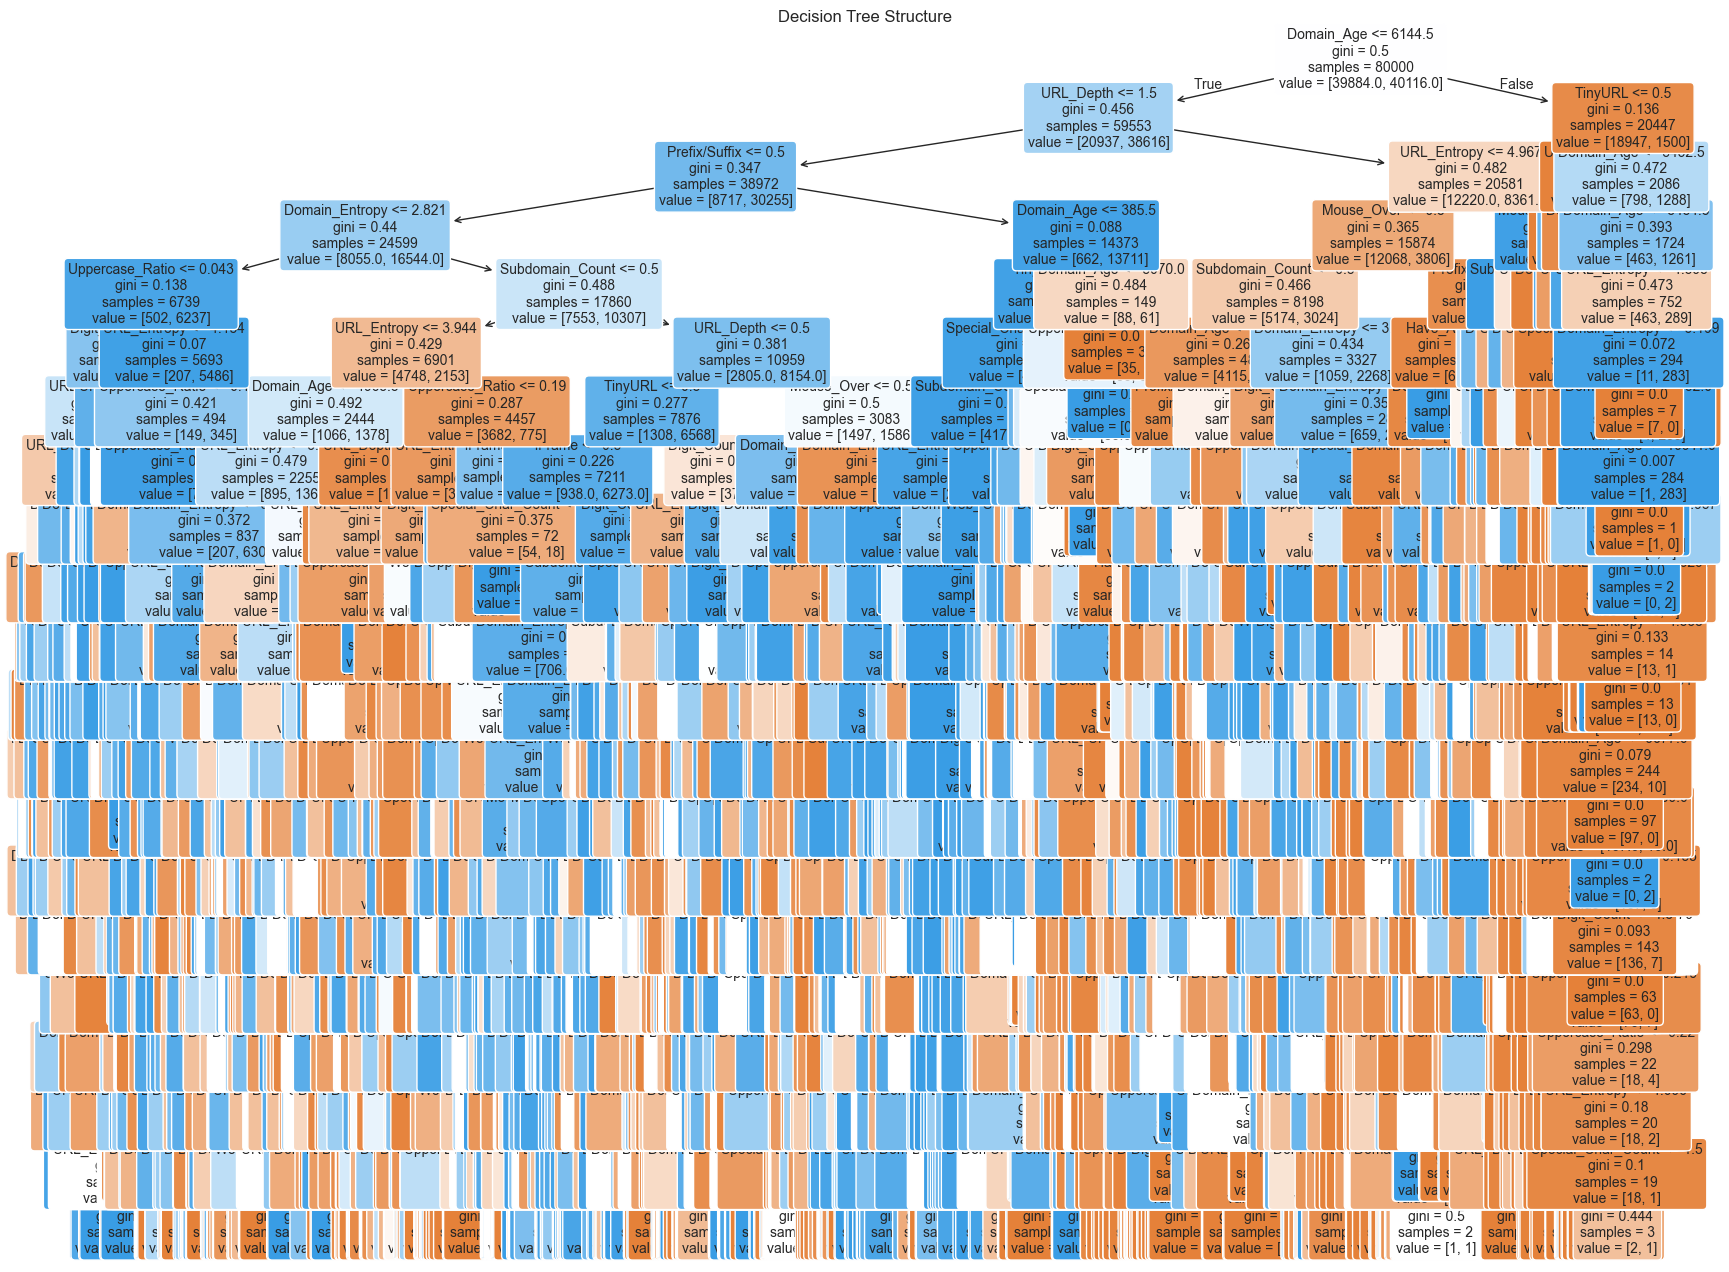

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

tree = DecisionTreeClassifier(max_depth=20, random_state=42)
tree.fit(X_train, y_train)
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)
prec_train_tree = precision_score(y_train, y_train_tree)
prec_test_tree = precision_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Precision on training Data: {:.3f}".format(prec_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(prec_test_tree))

plt.figure(figsize=(20, 16))
plot_tree(tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()


### **6.2. Random Forest Classifier**

---


Random Forest: Accuracy on training Data: 1.000
Random Forest: Accuracy on test Data: 0.958
Random Forest: Precision on training Data: 1.000
Random Forest: Precision on test Data: 0.958


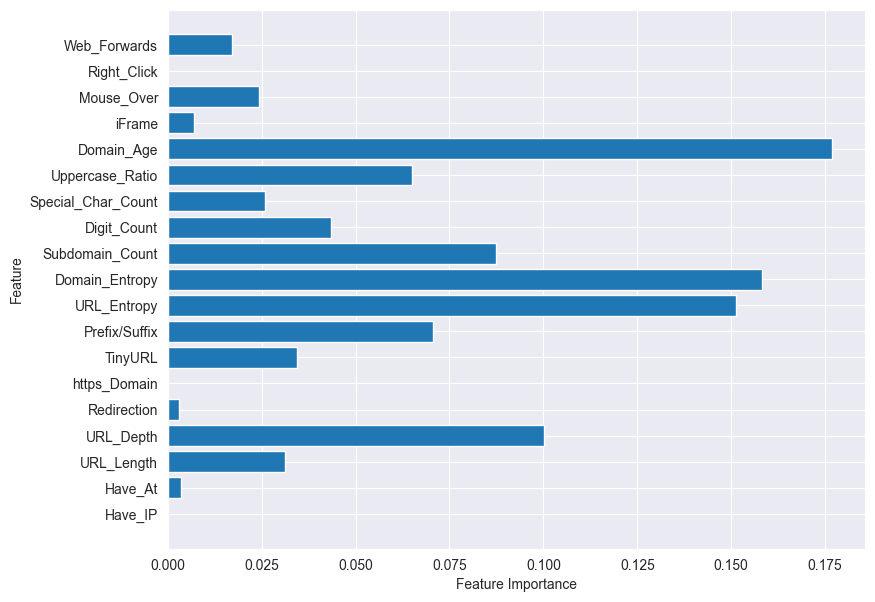

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=40, random_state=42)
forest.fit(X_train, y_train)
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test, y_test_forest)
prec_train_forest = precision_score(y_train, y_train_forest)
prec_test_forest = precision_score(y_test, y_test_forest)

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Random Forest: Precision on training Data: {:.3f}".format(prec_train_forest))
print("Random Forest: Precision on test Data: {:.3f}".format(prec_test_forest))

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


### **6.3. Multilayer Perceptrons (MLP)**

---


In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(300,300,300), random_state=42)
mlp.fit(X_train, y_train)
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

acc_train_mlp = accuracy_score(y_train, y_train_mlp)
acc_test_mlp = accuracy_score(y_test, y_test_mlp)
prec_train_mlp = precision_score(y_train, y_train_mlp)
prec_test_mlp = precision_score(y_test, y_test_mlp)

print("MLP: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("MLP: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print("MLP: Precision on training Data: {:.3f}".format(prec_train_mlp))
print("MLP: Precision on test Data: {:.3f}".format(prec_test_mlp))


MLP: Accuracy on training Data: 0.894
MLP: Accuracy on test Data: 0.896
MLP: Precision on training Data: 0.964
MLP: Precision on test Data: 0.960


### **6.4. XGBoost Classifier**

---


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.2, max_depth=42, random_state=42)
xgb.fit(X_train, y_train)
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

acc_train_xgb = accuracy_score(y_train, y_train_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_xgb)
prec_train_xgb = precision_score(y_train, y_train_xgb)
prec_test_xgb = precision_score(y_test, y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: Precision on training Data: {:.3f}".format(prec_train_xgb))
print("XGBoost: Precision on test Data: {:.3f}".format(prec_test_xgb))


XGBoost: Accuracy on training Data: 0.995
XGBoost: Accuracy on test Data: 0.957
XGBoost: Precision on training Data: 0.992
XGBoost: Precision on test Data: 0.956


## **7. Model Comparison**

We'll compile the results from all models.

---


In [15]:
# Creating holders for storing model performance results
ML_Model = []
acc_train_list = []
acc_test_list = []
prec_train_list = []
prec_test_list = []

def storeResults(model_name, acc_train_score, acc_test_score, prec_train_score, prec_test_score):
    ML_Model.append(model_name)
    acc_train_list.append(round(acc_train_score, 3))
    acc_test_list.append(round(acc_test_score, 3))
    prec_train_list.append(round(prec_train_score, 3))
    prec_test_list.append(round(prec_test_score, 3))

storeResults('Decision Tree', acc_train_tree, acc_test_tree, prec_train_tree, prec_test_tree)
storeResults('Random Forest', acc_train_forest, acc_test_forest, prec_train_forest, prec_test_forest)
storeResults('MLP', acc_train_mlp, acc_test_mlp, prec_train_mlp, prec_test_mlp)
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, prec_train_xgb, prec_test_xgb)
results = pd.DataFrame({'ML Model': ML_Model,
                        'Train Accuracy': acc_train_list,
                        'Test Accuracy': acc_test_list,
                        'Train Precision': prec_train_list,
                        'Test Precision': prec_test_list})
print(results.sort_values(by=['Test Accuracy', 'Test Precision', 'Train Accuracy', 'Train Precision'], ascending=False))


        ML Model  Train Accuracy  Test Accuracy  Train Precision  \
1  Random Forest           1.000          0.958            1.000   
3        XGBoost           0.995          0.957            0.992   
0  Decision Tree           0.985          0.948            0.983   
2            MLP           0.894          0.896            0.964   

   Test Precision  
1           0.958  
3           0.956  
0           0.947  
2           0.960  


In [16]:
# Storing all the trained models in a dictionary
trained_models = {
    'Decision Tree': tree,
    'Random Forest': forest,
    'MLP': mlp,
    'XGBoost': xgb,
}

# Save the dictionary to a file using pickle
import pickle
with open('trained_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)
